In [1]:
import numpy as np
import pandas as pd
import find_split as fs
import evaluation as ev
import matplotlib.pyplot as plt
from trees import binarySearchTree

In [2]:
#using the noisy dataset so we can see the effects of pruning
data = np.loadtxt('noisy_dataset.txt')
print(data[:5])

[[-59. -53. -51. -54. -45. -79. -87.   4.]
 [-66. -53. -59. -62. -69. -81. -79.   1.]
 [-41. -57. -63. -40. -73. -66. -65.   2.]
 [-62. -58. -52. -63. -50. -87. -88.   4.]
 [-63. -58. -64. -67. -74. -87. -87.   4.]]


max depth: 18
---RESULT METRICS---
Precisions:   [0.71929825 0.79166667 0.8        0.8       ]
Recalls:      [0.78846154 0.71698113 0.8        0.8       ]
F1 Score:     [0.75229358 0.75247525 0.8        0.8       ]
Avg Accuracy: 0.775


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


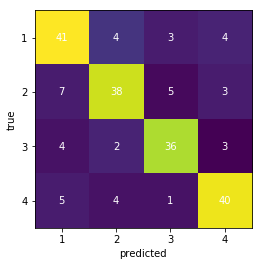

In [3]:
#first, create a train and test set 
#evaluate on the test set to see pre-pruning results

data2=data.copy()
#shuffle data
np.random.shuffle(data2)
t_split=0.8
v_split=0.9
train=data2[:int(len(data2)*t_split)]
validation=data2[int(len(data2)*t_split):(int(len(data2)*v_split))]
test=data2[int(len(data2)*v_split):]

model=binarySearchTree(train)
print('max depth:',model.get_max_depth())
y_pred=model.predict(test[:,:-1])
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
i=ev.get_metrics(test[:,-1], y_pred, printout=True)

In [4]:
#now prune the model
#use print_path=False to not print
model.prune_tree(validation,print_path=True)

current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.7798732436634769
did not prune
current f1: 0.7803122995915888
new f1 score: 0.7798732436634769
did not prune
current f1: 0.7803122995915888
new f1 score: 0.7803122995915888
pruned 1!
current f1: 0.7803122995915888
new f1 score: 0.784895182508945
pruned 1!
current f1: 0.784895182508945
n

new f1 score: 0.855124576146248
pruned 1!
current f1: 0.855124576146248
new f1 score: 0.855124576146248
pruned 1!
current f1: 0.855124576146248
new f1 score: 0.855124576146248
pruned 1!
current f1: 0.855124576146248
new f1 score: 0.855124576146248
pruned 1!
current f1: 0.855124576146248
new f1 score: 0.855124576146248
pruned 1!
current f1: 0.855124576146248
new f1 score: 0.8596697788427112
pruned 1!
current f1: 0.8596697788427112
new f1 score: 0.8596697788427112
pruned 1!
current f1: 0.8596697788427112
new f1 score: 0.8596697788427112
pruned 1!
current f1: 0.8596697788427112
new f1 score: 0.8596697788427112
pruned 1!
current f1: 0.8596697788427112
new f1 score: 0.8594533773105202
did not prune
current f1: 0.8596697788427112
new f1 score: 0.8596697788427112
pruned 1!
current f1: 0.8596697788427112
new f1 score: 0.8596697788427112
pruned 1!
current f1: 0.8596697788427112
new f1 score: 0.8596697788427112
pruned 1!
current f1: 0.8596697788427112
new f1 score: 0.8596697788427112
pruned 1!
c

---RESULT METRICS---
Precisions:   [0.85185185 0.97727273 0.89130435 0.82142857]
Recalls:      [0.88461538 0.81132075 0.91111111 0.92      ]
F1 Score:     [0.86792453 0.88659794 0.9010989  0.86792453]
Avg Accuracy: 0.88


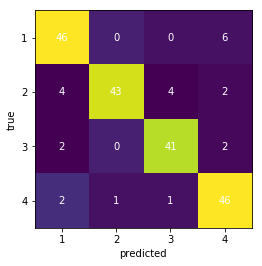

In [5]:
#now use the pruned model on the test set again

y_pred=model.predict(test[:,:-1])
#evaluate
cm=ev.confusion_matrix(test[:,-1],y_pred,plot=True)
i=ev.get_metrics(test[:,-1], y_pred, printout=True)